In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder='desktop/crem/data ree'

In [3]:
df_rawdata=pd.read_csv(os.path.abspath('/Users/Roman/Desktop/CREM/DATA REE/DATA_REE'))
df_rawdata=df_rawdata[df_rawdata['type_entreprise']!='Inconnu']
df=df_rawdata.loc[:,['secteur','section','type_entreprise']]
df['nbre_employés']=df['type_entreprise']


<IPython.core.display.Javascript object>


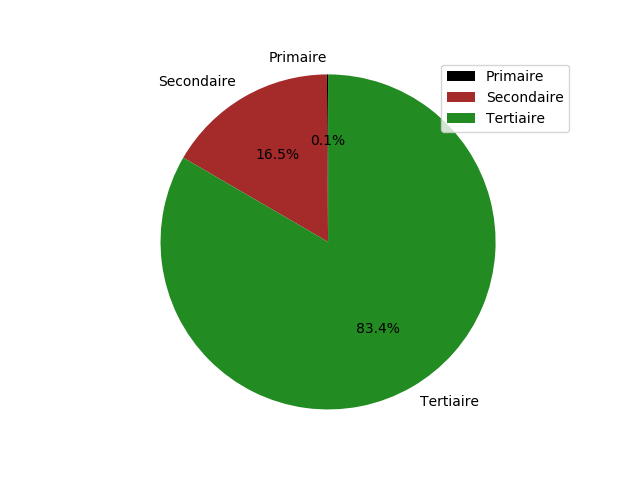

In [4]:
%matplotlib notebook

plt.figure("Répartition du nombre d'entreprise par secteur sur la commune du Grand Lancy")
labels=['Primaire','Secondaire','Tertiaire']
colors=['black','brown','forestgreen']
plt.pie(df[df['secteur']!='Autres'].groupby('secteur')['type_entreprise'].count(),colors=colors,labels=labels,startangle=90,autopct='%.1f%%')
plt.axis('equal')
plt.legend()

<IPython.core.display.Javascript object>


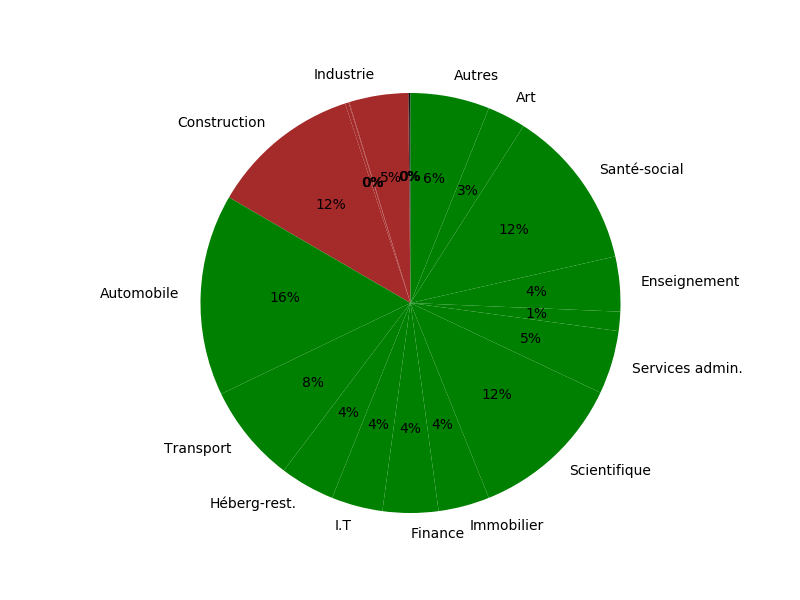

(-1.10601460616088,
 1.1013060523601961,
 -1.1000000011698217,
 1.1000000000557058)

In [5]:
labels=['','','Industrie','',"",'Construction','Automobile','Transport','Héberg-rest.','I.T','Finance','Immobilier','Scientifique','Services admin.','','Enseignement','Santé-social','Art','Autres']
colors=['black','black','brown','brown','brown','brown','green','green','green','green','green','green','green','green','green','green','green','green','green','green']
plt.figure("Répartition du nbre d'entreprises par secteur",figsize=(8,6))
plt.pie(df.groupby(['secteur','section'])['type_entreprise'].count(),colors=colors,labels=labels,startangle=90,autopct='%.f%%')
plt.axis('equal')

In [6]:
df.groupby(['secteur','section'])['type_entreprise'].count()
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)
df.head()

,secteur,section,type_entreprise,nbre_employés
0,primaire,A,Microentreprise,Microentreprise
1,primaire,A,Microentreprise,Microentreprise
2,secondaire,B,Microentreprise,Microentreprise
3,secondaire,C,Microentreprise,Microentreprise
4,secondaire,C,Microentreprise,Microentreprise


In [7]:
nbre_employé={'Microentreprise':2.21,'Petite entreprise':19.25,'Moyenne entreprise':98.83,'Grande entreprise':900}

def change(x):
    return nbre_employé[x]

df['nbre_employés']=df['nbre_employés'].map(change)

<IPython.core.display.Javascript object>


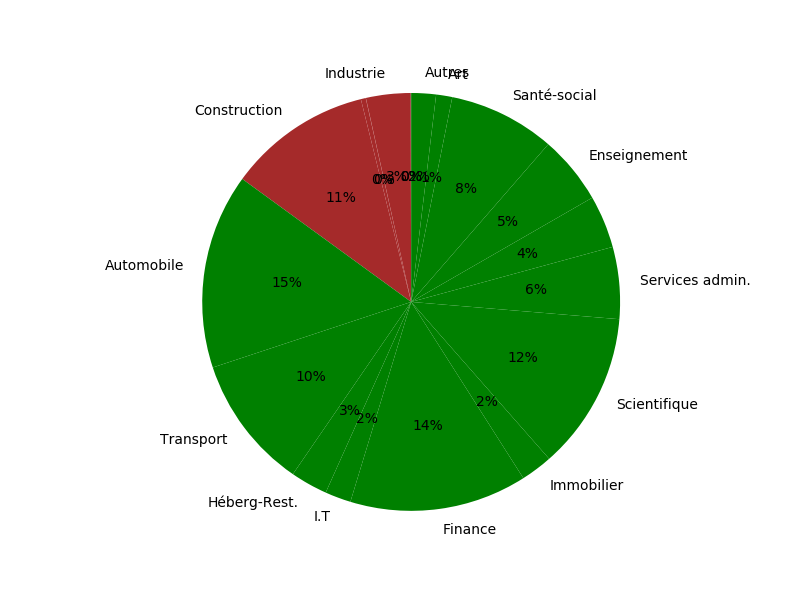

(-1.1132289271525551,
 1.1020895727671278,
 -1.1108382428889179,
 1.1005161068042342)

In [8]:
labels=['','','Industrie','',"",'Construction','Automobile','Transport','Héberg-Rest.','I.T','Finance','Immobilier','Scientifique','Services admin.','','Enseignement','Santé-social','Art','Autres']
colors=['black','black','brown','brown','brown','brown','green','green','green','green','green','green','green','green','green','green','green','green','green','green']
plt.figure("Répartition de l'emploi par secteur",figsize=(8,6))
plt.pie(df.groupby(['secteur','section'])['nbre_employés'].sum(),colors=colors,labels=labels,startangle=90,autopct='%.f%%')
plt.axis('equal')

In [9]:
df1=df.groupby(['secteur','section','type_entreprise']).sum()
df2=df.groupby(['secteur','section']).sum()

<IPython.core.display.Javascript object>


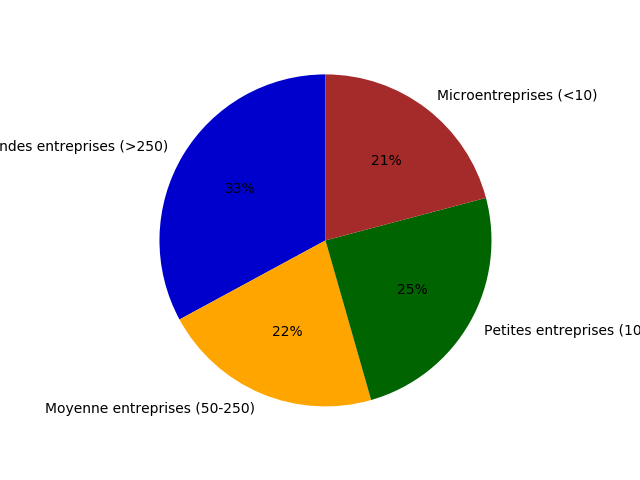

(-1.1051631447167758,
 1.135530638137543,
 -1.1252382132267873,
 1.101201819677466)

In [10]:
plt.figure("Répartition de l'emploi par type d'entreprise")
plt.pie(df.groupby(['type_entreprise'])['nbre_employés'].sum(),labels=['Grandes entreprises (>250)','Moyenne entreprises (50-250)','Petites entreprises (10-50)','Microentreprises (<10)'],colors=['mediumblue','orange','darkgreen','brown'],startangle=90,autopct='%.f%%')
plt.axis('equal')


In [11]:
df2.rename(columns={"nbre_employés": "nbre_employés_tot_section"},inplace=True)
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
DF=df1.merge(df2,how='left')

In [12]:
DF['Part_emploi']=100*DF['nbre_employés']/DF['nbre_employés_tot_section']
DF.groupby(['secteur','type_entreprise'])['nbre_employés'].sum()/DF.groupby('secteur')['nbre_employés'].sum()

secteur     type_entreprise   
primaire    Microentreprise       1.000000
secondaire  Grande entreprise     0.366617
            Microentreprise       0.231364
            Moyenne entreprise    0.080517
            Petite entreprise     0.321502
tertiaire   Grande entreprise     0.322511
            Microentreprise       0.212241
            Moyenne entreprise    0.276239
            Petite entreprise     0.189009
Name: nbre_employés, dtype: float64

In [13]:
DFF=DF.pivot_table(index='section',columns='type_entreprise',values='Part_emploi')
DFF.fillna(0,inplace=True)

In [14]:
# Secteur primaire, secondaire, tertiaire
ajout=pd.DataFrame([[0,0,0,0],[0,100,0,0],[36.66,23.13,8.05,32.15],[32.25,21.22,27.62,18.9]],columns=DFF.columns.tolist())
zero=pd.DataFrame([[0,0,0,0]],columns=DFF.columns.tolist())
DFF=DFF.append(ajout)
DFF

type_entreprise,Grande entreprise,Microentreprise,Moyenne entreprise,Petite entreprise
A,0.000000,100.000000,0.000000,0.000000
B,0.000000,100.000000,0.000000,0.000000
C,0.000000,27.423729,35.039265,37.537005
D,0.000000,100.000000,0.000000,0.000000
E,0.000000,7.109538,0.000000,92.890462
F,49.337236,22.170509,0.000000,28.492254
G,36.322251,22.654592,23.931520,17.091637
H,53.031330,15.887008,17.470288,13.611375
I,0.000000,30.012519,20.970993,49.016487
J,0.000000,41.581695,0.000000,58.418305


In [15]:
# Ajout de zéro entre les secteurs

emploi=pd.merge(DFF.iloc[0,:].to_frame().T,zero,how='outer')
emploi=emploi.append(DFF.iloc[1:6,:])
emploi=emploi.append(zero)
emploi=emploi.append(DFF.iloc[6:,:])

<IPython.core.display.Javascript object>


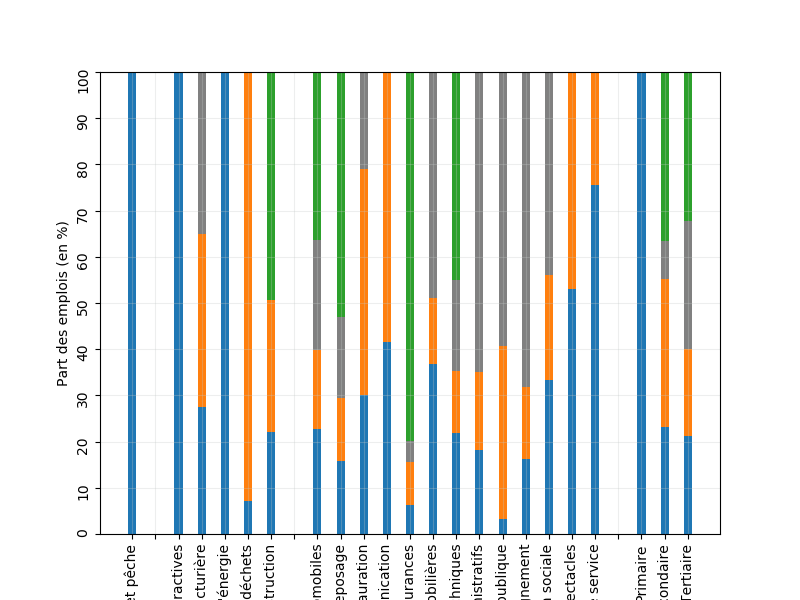

In [16]:
plt.figure('Répartition des emplois par type économique et classes de taille',figsize=(8,6))

width=0.35
micro=emploi['Microentreprise']
petite=emploi['Petite entreprise']
moyenne=emploi['Moyenne entreprise']
grande=emploi['Grande entreprise']
N=np.arange(25)

plt.bar(N,micro,width)
plt.bar(N,petite,width,bottom=micro)
plt.bar(N,moyenne,width,bottom=petite+micro,color='grey')
plt.bar(N,grande,width,bottom=moyenne+petite+micro)
plt.xticks(N, ('A  Agriculture, sylviculture et pêche', '','B  Indutries extractives', 'C  Industrie manufacturière', "D  Production et distribution d'énergie", "E  Prod./ distrib. d'eau; gestion des déchets",'F  Construction','',"G  Commerce; réparation d'automobiles",'H  Transports et entreposage','I  Hébergement et restauration','J  Information communication','K  Activités financières, assurances','L  Activités immobilières','M  Activités spécialisées, scientifiques et techniques','N  Activités de services administratifs','O  Administration publique','P  Enseignement','Q  Santé humaine et action sociale','R  Arts, spectacles','S  Autres activités de service','','Primaire','Secondaire','Tertiaire'),rotation=90)

plt.yticks(np.arange(0, 101, 10),rotation=90)
plt.ylabel('Part des emplois (en %)')
plt.grid(color='xkcd:silver',alpha=0.3)



In [17]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='versi.roman', api_key='gQp1lZxt6QI3HCTfKGzf')

In [18]:
dff=df_rawdata.loc[:,['secteur','section','type_entreprise','division']]
dff['nbre_employés']=dff['type_entreprise']
dff['nbre_employés']=dff['nbre_employés'].map(change)
dff.replace(to_replace='Microentreprise',value=1,inplace=True)
dff.replace(to_replace='Petite entreprise',value=2,inplace=True)
dff.replace(to_replace='Moyenne entreprise',value=3,inplace=True)
dff.replace(to_replace='Grande entreprise',value=4,inplace=True)
dff.head()

,secteur,section,type_entreprise,division,nbre_employés
0,primaire,A,1,1,2.21
3,primaire,A,1,1,2.21
35,secondaire,B,1,8,2.21
37,secondaire,C,1,10,2.21
38,secondaire,C,1,10,2.21


In [22]:
a

type_entreprise,Grande entreprise,Microentreprise,Moyenne entreprise,Petite entreprise
section,,,,
A,0.000000,100.000000,0.000000,0.000000
B,0.000000,100.000000,0.000000,0.000000
C,0.000000,84.337349,2.409639,13.253012
D,0.000000,100.000000,0.000000,0.000000
E,0.000000,40.000000,0.000000,60.000000
F,0.473934,86.729858,0.000000,12.796209
G,0.353357,89.752650,2.120141,7.773852
H,0.724638,88.405797,2.173913,8.695652
I,0.000000,83.116883,1.298701,15.584416


<IPython.core.display.Javascript object>


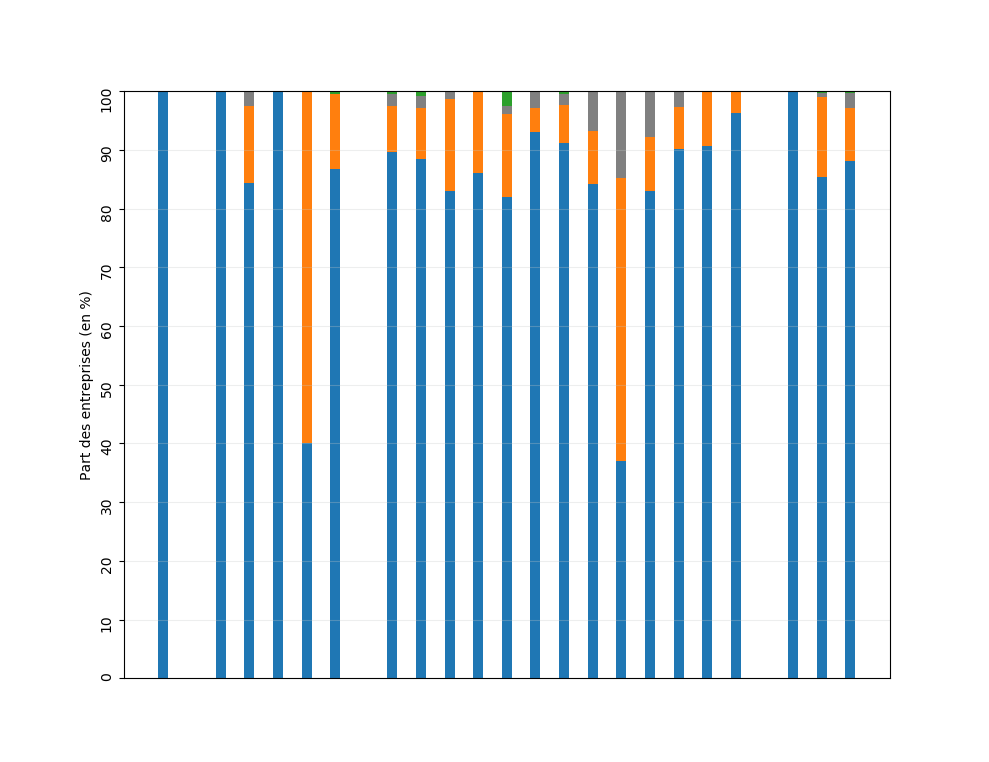

In [31]:
entreprise=100*df.groupby(['section','type_entreprise'])['nbre_employés'].count()/df.groupby(['section'])['nbre_employés'].count()
a=entreprise.to_frame()
a=a.pivot_table(index='section',columns='type_entreprise',values='nbre_employés')
a.fillna(0,inplace=True)

# Ajout de zéro entre les secteurs

entreprise=pd.merge(a.iloc[0,:].to_frame().T,zero,how='outer')
entreprise=entreprise.append(a.iloc[1:6,:])
entreprise=entreprise.append(zero)
entreprise=entreprise.append(a.iloc[6:,:])

# Secteur primaire, secondaire, tertiaire

ajout=pd.DataFrame([[0,0,0,0],[0,100,0,0],[0.33,85.38,0.66,13.62],[0.33,88.1,2.56,9]],columns=DFF.columns.tolist())
entreprise=entreprise.append(ajout)

plt.figure("Répartition du nombre d'Entreprise par type économique et classes de taille",figsize=(8,6))

width=0.35
micro=entreprise['Microentreprise']
petite=entreprise['Petite entreprise']
moyenne=entreprise['Moyenne entreprise']
grande=entreprise['Grande entreprise']
N=np.arange(25)

plt.bar(N,micro,width)
plt.bar(N,petite,width,bottom=micro)
plt.bar(N,moyenne,width,bottom=petite+micro,color='grey')
plt.bar(N,grande,width,bottom=moyenne+petite+micro)
plt.xticks(N, ('A  Agriculture, sylviculture et pêche', '','B  Indutries extractives', 'C  Industrie manufacturière', "D  Production et distribution d'énergie", "E  Prod./ distrib. d'eau; gestion des déchets",'F  Construction','',"G  Commerce; réparation d'automobiles",'H  Transports et entreposage','I  Hébergement et restauration','J  Information communication','K  Activités financières, assurances','L  Activités immobilières','M  Activités spécialisées, scientifiques et techniques','N  Activités de services administratifs','O  Administration publique','P  Enseignement','Q  Santé humaine et action sociale','R  Arts, spectacles','S  Autres activités de service','','Primaire','Secondaire','Tertiaire'),rotation=90)
plt.yticks(np.arange(0, 101, 10),rotation=90)
plt.xticks([])
plt.ylabel('Part des entreprises (en %)')
plt.grid(color='xkcd:silver',alpha=0.3)

In [28]:
100*df.groupby(['secteur','type_entreprise'])['nbre_employés'].count()/df.groupby('secteur')['nbre_employés'].count()

secteur     type_entreprise   
primaire    Microentreprise       100.000000
secondaire  Grande entreprise       0.332226
            Microentreprise        85.382060
            Moyenne entreprise      0.664452
            Petite entreprise      13.621262
tertiaire   Grande entreprise       0.328731
            Microentreprise        88.099934
            Moyenne entreprise      2.564103
            Petite entreprise       9.007232
Name: nbre_employés, dtype: float64